In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 

#Uploading & visualissation

In [5]:
#extracting the data file from directly sorce and storing as the panda dataframe
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls')
df_copy=df
df_copy2=df
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [6]:
display(df.info()) #checking of the type of data in each collumn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

None

#summary of data
total 82 columns,1080rows data type avilable are float and object
out of which 77 has datatype float64, and 5 has dtype object

In [7]:
#checking the column name which having the data of object type variable for each collumn
i,j=0,0
f=[]
for col in df.columns.values:
  if df[col].dtype=='float64':
    i=i+1
    f.append(col)
  else:
    j=j+1
    print('data type object collumn name is : ',col)

print('no. of variable having data type float64 are',f) #printing column name having data type other than object type

data type object collumn name is :  MouseID
data type object collumn name is :  Genotype
data type object collumn name is :  Treatment
data type object collumn name is :  Behavior
data type object collumn name is :  class
no. of variable having data type float64 are ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N

data type object collumn name is :  MouseID \
data type object collumn name is :  Genotype\
data type object collumn name is :  Treatment\
data type object collumn name is :  Behavior\
data type object collumn name is :  class
\n 

#Checking of total unique and null values

In [8]:
#dropping duplicates if any
df = df.drop_duplicates()

#unique and null values 
for col in df.columns.values:
  list_vals = pd.unique(df[col]) #list of unique values
  print(col + ' has ' + str(len(list_vals))  +' unique values, ' + str(df[col].isna().sum())+' null entries and datatype ' + str(df[col].dtype) )
  if len(list_vals) < 10:
    list_str = ''
    for n in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n]) + ', '
    print(' These are: '+list_str[0:len(list_str) - 2])

MouseID has 1080 unique values, 0 null entries and datatype object
DYRK1A_N has 1078 unique values, 3 null entries and datatype float64
ITSN1_N has 1077 unique values, 3 null entries and datatype float64
BDNF_N has 1078 unique values, 3 null entries and datatype float64
NR1_N has 1078 unique values, 3 null entries and datatype float64
NR2A_N has 1078 unique values, 3 null entries and datatype float64
pAKT_N has 1077 unique values, 3 null entries and datatype float64
pBRAF_N has 1076 unique values, 3 null entries and datatype float64
pCAMKII_N has 1078 unique values, 3 null entries and datatype float64
pCREB_N has 1078 unique values, 3 null entries and datatype float64
pELK_N has 1078 unique values, 3 null entries and datatype float64
pERK_N has 1078 unique values, 3 null entries and datatype float64
pJNK_N has 1077 unique values, 3 null entries and datatype float64
PKCA_N has 1078 unique values, 3 null entries and datatype float64
pMEK_N has 1078 unique values, 3 null entries and datat

 #THE DATA HAS FEW NULL ENTRIES AROUND SEVERAL COLUMNS\n


 #as the collumns having large multiple values can be considered as the continous
where as the  collumn having genotype object data can be mapped as the discrete variable foe the classification basis.

#the collumns with object data type

Genotype is of typeobject,has 2 unique values these are:**Control,Ts65D** \
Treatment is of typeobject,has 2 unique values these are:**Memantine,Salin** \
Behavior is of typeobject,has 2 unique values these are:**C/S,S/C** \
class is of typeobject,has 8 unique values these are:**c-CS-m,c-SC-m,c-CS-s,c-SC-s,t-CS-m,t-SC-m,t-CS-s,t-SC-s** \
\
as we need to predict problem is to either predict the genotype (binary) or the class using the gene expression variables from DYRK1A_N to CaNA_N, we will be droppng **"Treatment"** and **"behaviour"** and **"MouseID"**

In [9]:
#dropping Treatment,Behavior, MouseID columns
df=df.drop(['MouseID','Treatment','Behavior'],axis=1)

#**#Prediction of the Genotype dropping class** \n
Heatplot will only plot float it wont plot genotype
#Prearing the data

In [10]:
#Prediction of the Genotype dropping class
df=df.drop(['class'],axis=1)
map_genotype={'Control':0,'Ts65Dn':1}
df= df.replace({'Genotype': map_genotype})

In [11]:
from sklearn.experimental import enable_iterative_imputer    
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)    # Imputing the values using Multivariate feature imputation
imp.fit(df)

data = imp.transform(df)
data

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


array([[0.50364388, 0.74719322, 0.4301753 , ..., 0.1281856 , 1.67565235,
        0.        ],
       [0.51461708, 0.68906355, 0.41177034, ..., 0.1311187 , 1.74360965,
        0.        ],
       [0.50918309, 0.7302468 , 0.41830878, ..., 0.12743108, 1.92642659,
        0.        ],
       ...,
       [0.22869955, 0.39517937, 0.23411809, ..., 0.35521305, 1.43082502,
        1.        ],
       [0.22124241, 0.41289438, 0.24397413, ..., 0.36535319, 1.40403123,
        1.        ],
       [0.30262572, 0.46105919, 0.25656431, ..., 0.36527803, 1.37099946,
        1.        ]])

#Checking of null values after Imputation of the variable $\Downarrow$

In [12]:
#forming new frame from iterated numpya array data
frame=pd.DataFrame(data,columns=df.columns) #now frame is a pdDataFrame

#again checking for null values in the new frame
for col in frame.columns.values:
  list_vals = pd.unique(frame[col]) #list of unique values
  print(col + ' has ' + str(len(list_vals))  +' unique values, ' + str(frame[col].isna().sum())+' null entries and datatype ' + str(frame[col].dtype) )
  if len(list_vals) < 10:
    list_str = ''
    for n in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n]) + ', '
    print(' These are: '+list_str[0:len(list_str) - 2])

DYRK1A_N has 1080 unique values, 0 null entries and datatype float64
ITSN1_N has 1079 unique values, 0 null entries and datatype float64
BDNF_N has 1080 unique values, 0 null entries and datatype float64
NR1_N has 1080 unique values, 0 null entries and datatype float64
NR2A_N has 1080 unique values, 0 null entries and datatype float64
pAKT_N has 1079 unique values, 0 null entries and datatype float64
pBRAF_N has 1078 unique values, 0 null entries and datatype float64
pCAMKII_N has 1080 unique values, 0 null entries and datatype float64
pCREB_N has 1080 unique values, 0 null entries and datatype float64
pELK_N has 1080 unique values, 0 null entries and datatype float64
pERK_N has 1080 unique values, 0 null entries and datatype float64
pJNK_N has 1079 unique values, 0 null entries and datatype float64
PKCA_N has 1080 unique values, 0 null entries and datatype float64
pMEK_N has 1080 unique values, 0 null entries and datatype float64
pNR1_N has 1080 unique values, 0 null entries and datat

#Visualisation of the data using histogram plots


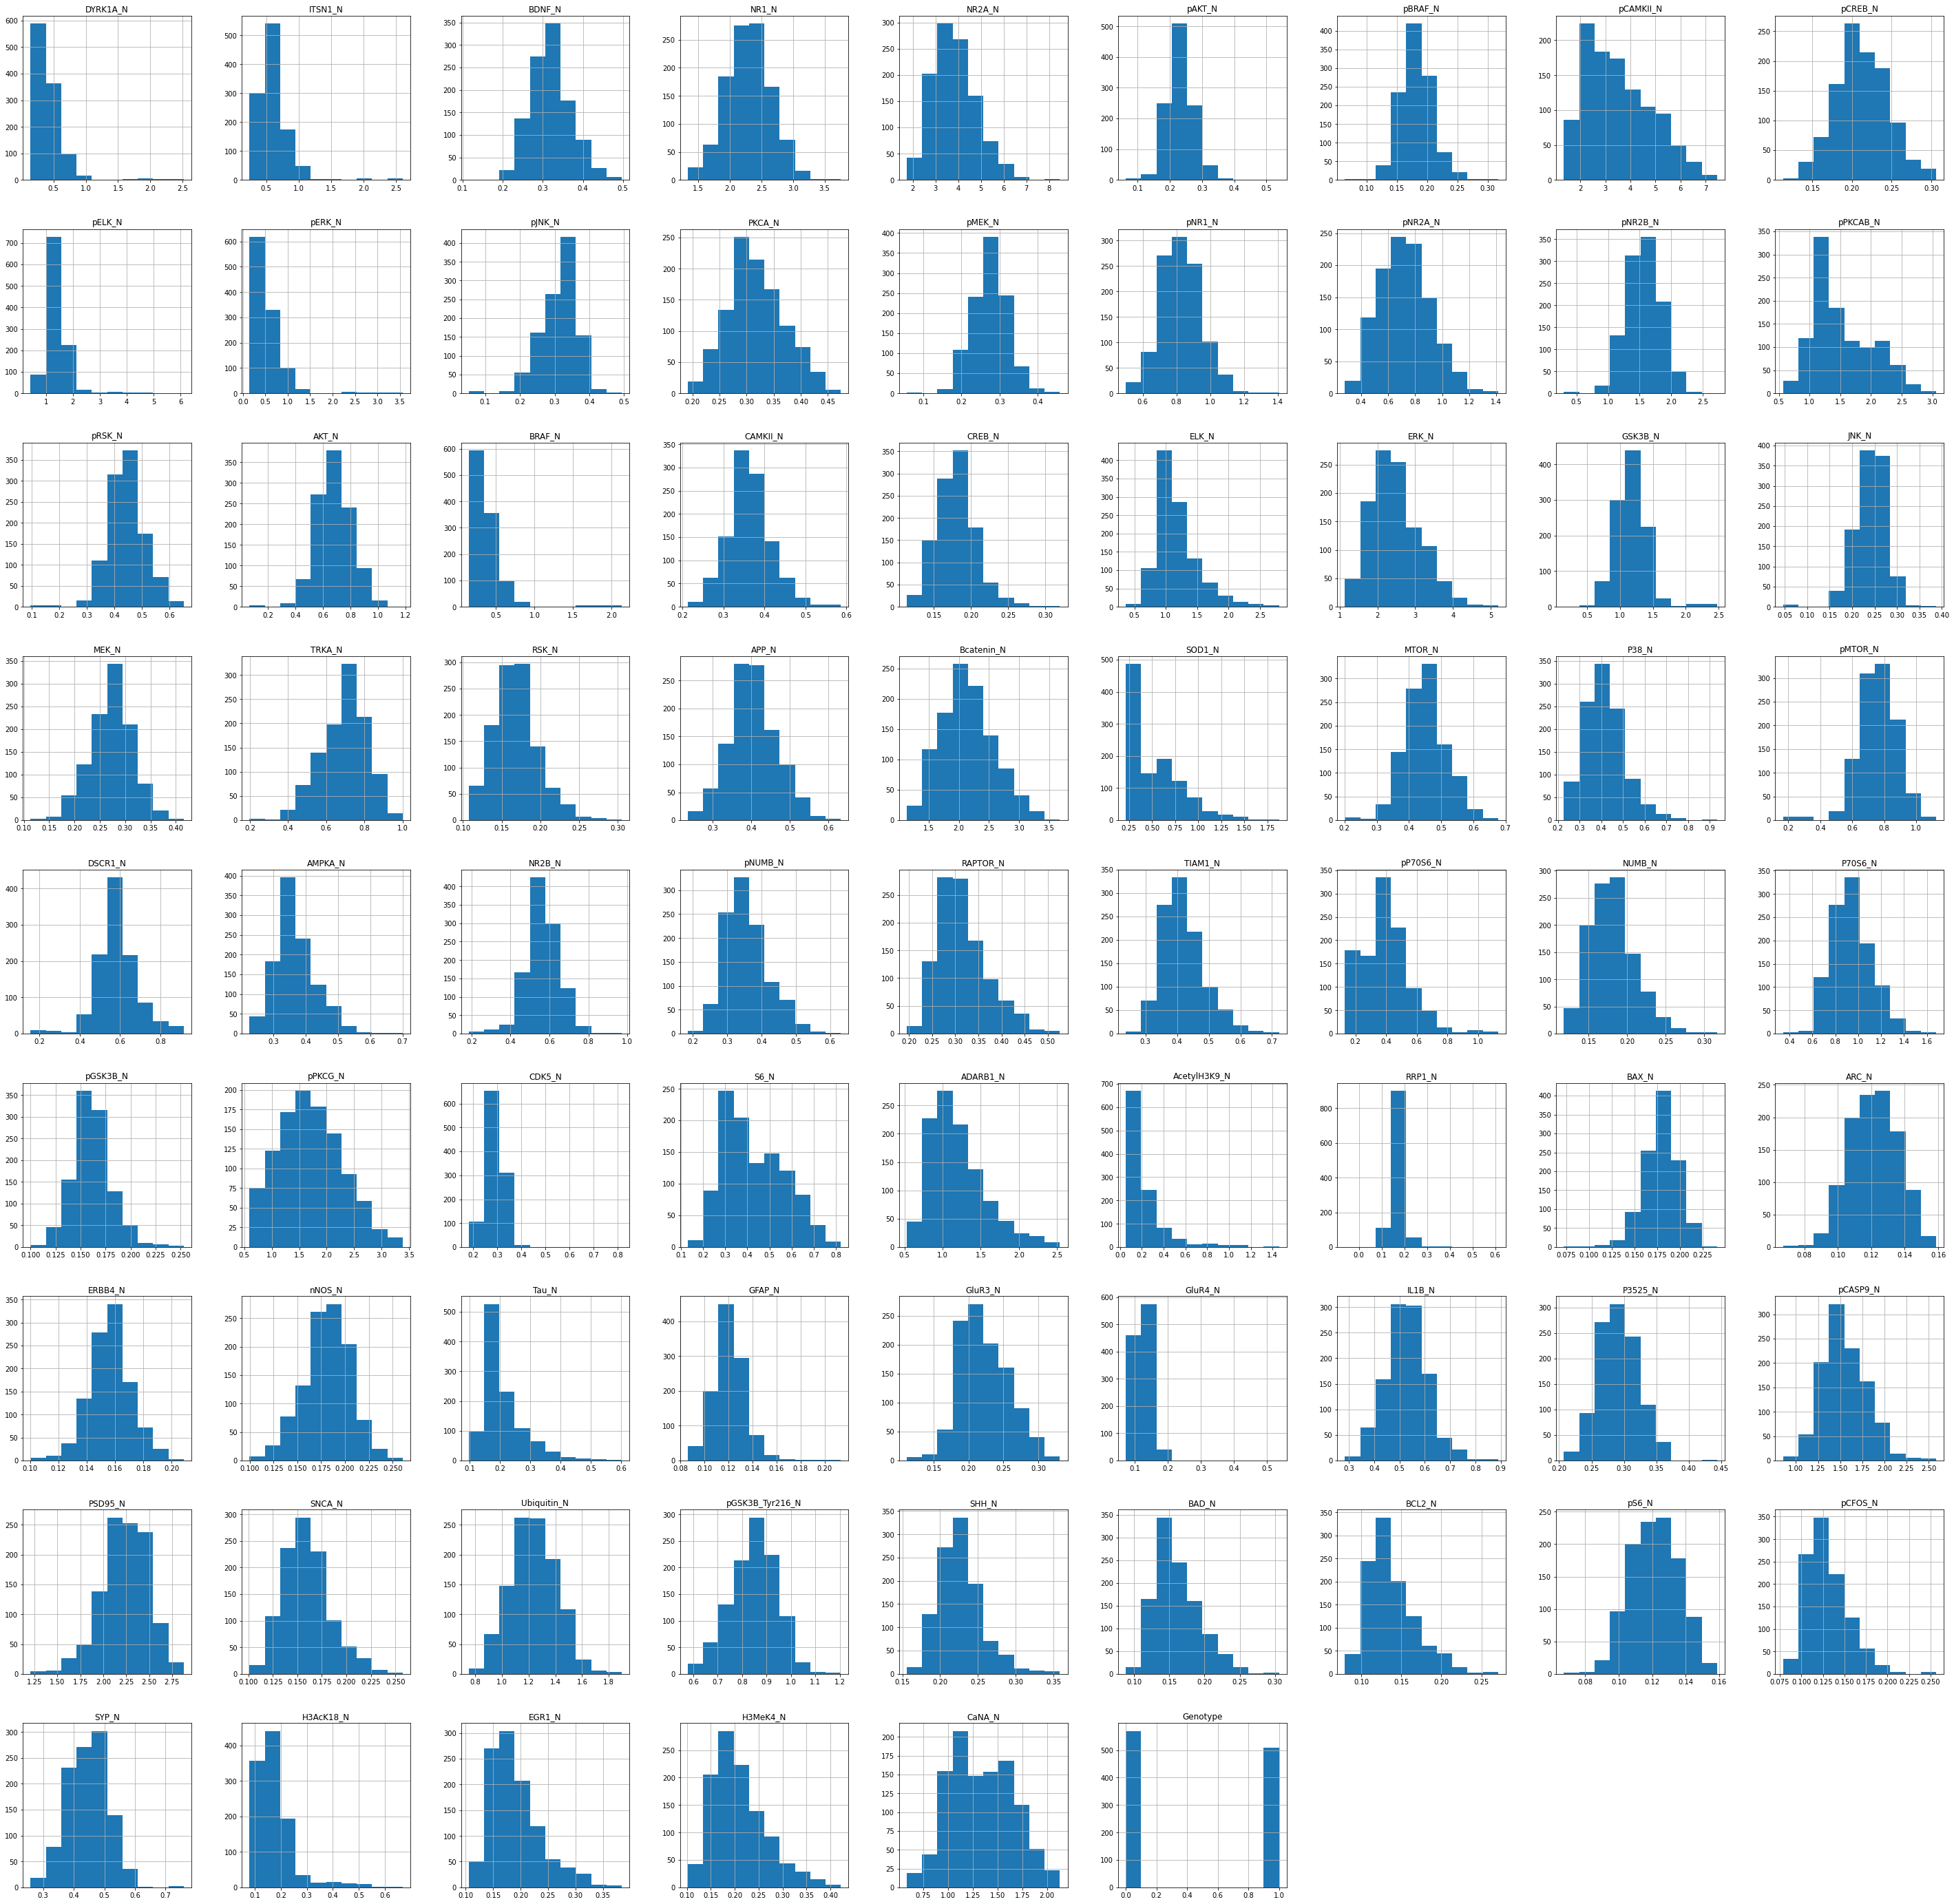

In [13]:
frame.hist(bins=10, figsize=(50,50))
plt.show()

<function matplotlib.pyplot.show>

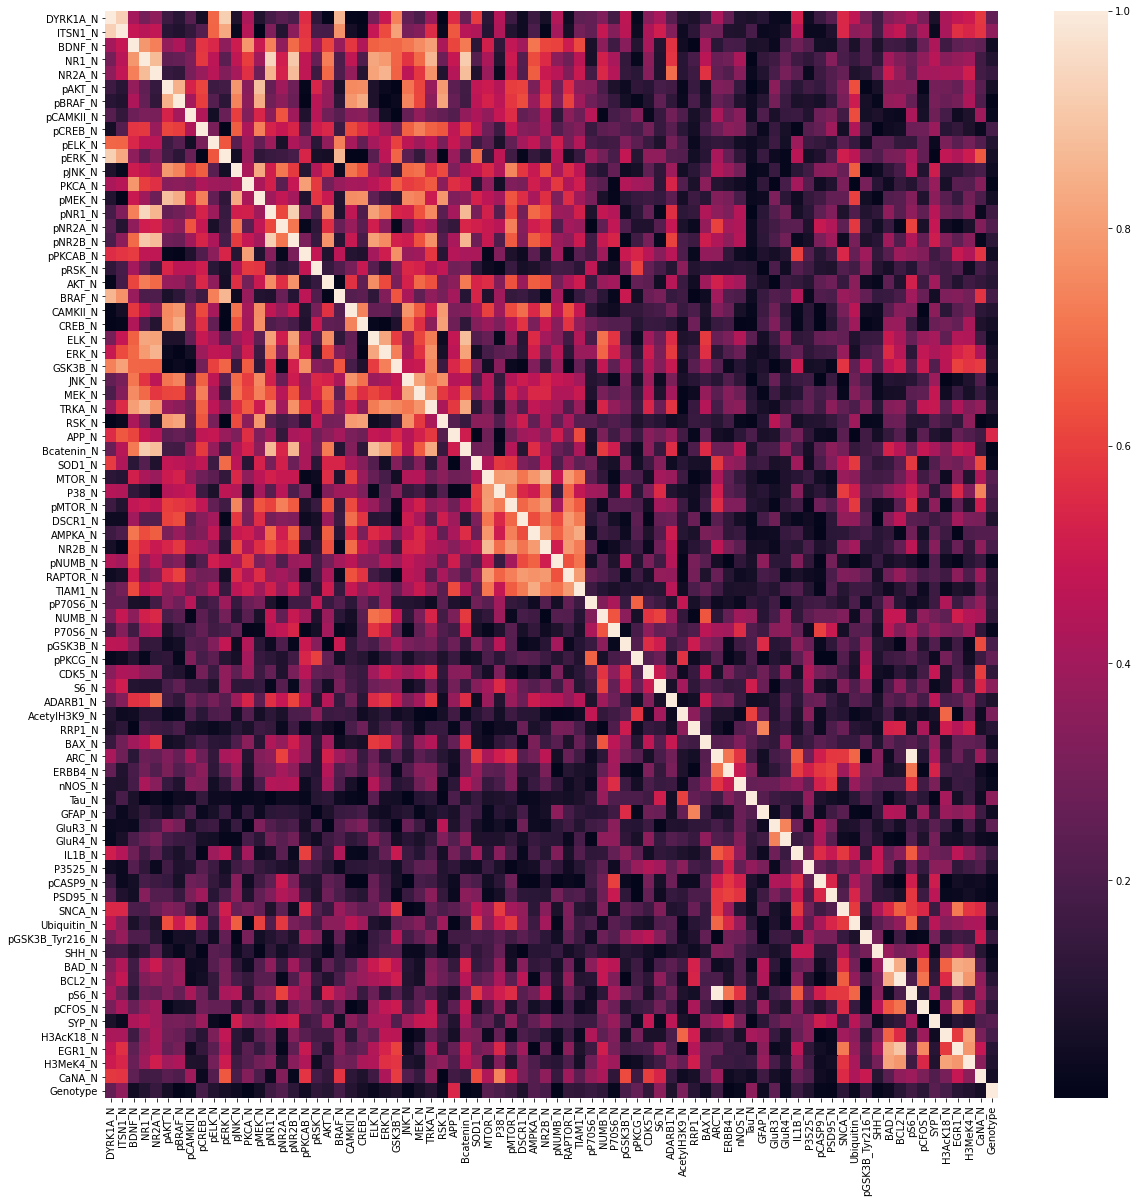

In [14]:
#checking spearman correlation map after plotting absolute value of the float variables
corrmat=frame.corr(method="spearman")
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(abs(corrmat),annot=False)
plt.show

 #most of the variable are seems to be uncorrelated s visualisation by heatmap 
 \n
 except DYRK1A_N, ITSN1_N having correlation index of range 0.7 to 0.85
 one of these can be dropped

In [15]:
#storing of variable in the variable X and Y
X=frame.drop(['Genotype'],axis=1) #test_x
Y=frame['Genotype'] #test_y

In [16]:
#splitting of test data on train data and test data in 70/30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [17]:
#scaling and data/Normalising data using sklearn.preproseccing.standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#LASSO regularized logistic regression

Training of model and Testing

In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
#Cross validation search for L1 lasso model
L1_reg =Lasso() 
hyperparameters = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]} # defining hyperparameters
clf_lasso = GridSearchCV(L1_reg, hyperparameters, scoring = 'neg_mean_squared_error')
clf_lasso.fit(X_train, Y_train)
print('Best hyperparameters are ', clf_lasso.best_params_)
print('the poly coefficients are',clf_lasso.best_estimator_.coef_)

Best hyperparameters are  {'alpha': 0.001}
the poly coefficients are [-0.02417414  0.36165681  0.         -0.12645418  0.          0.06551341
  0.02651541  0.          0.05326986 -0.01440851 -0.00826299 -0.03902996
  0.04878808 -0.02436991 -0.02190462 -0.05523344  0.14775138 -0.13119197
 -0.03933637  0.05537856 -0.26920548 -0.08377507 -0.         -0.09061921
 -0.18346977 -0.00814901  0.          0.0252315   0.15301244 -0.06897449
  0.24706197 -0.03102878  0.02867998 -0.06550118 -0.03496024  0.
  0.09202686 -0.13866439 -0.0706255  -0.04525697 -0.01984101  0.11351007
  0.03778653  0.05166026  0.00187472  0.01266935 -0.00517649  0.
 -0.          0.01506778  0.          0.0179347   0.0007612  -0.03012157
  0.0853575   0.00175185  0.02922081  0.00525772 -0.10039406  0.
 -0.07695528  0.00472886  0.04566186  0.          0.02750224 -0.
 -0.         -0.03831532  0.03375193  0.         -0.00134057 -0.00753411
 -0.09136477 -0.03333992 -0.          0.02874995  0.01682856]


Testing for the L1 logistic classification

In [19]:
#Testing of the model
lasso_final_model=clf_lasso.best_estimator_
prediction=lasso_final_model.predict(X_test)

#Considering 0.5 as descision boundary , if prediction less than 0.5 itll be 0 control and greater will be Ts65Dn
for i in range(0,len(prediction)):
  if prediction[i]>= 0.5:
    prediction[i] = 1
  else:
    prediction[i] = 0
print('testing parameters for Logistic Classification')
print('\nAccuracy score:',metrics.accuracy_score(Y_test,prediction))
print('\nf1 score      :', metrics.f1_score(Y_test, prediction))
print('\nroc_auc_score : ', metrics.roc_auc_score(Y_test, prediction)) 

testing parameters for Logistic Classification

Accuracy score: 0.9753086419753086

f1 score      : 0.9733333333333333

roc_auc_score :  0.9747731883780576


## #2Support Vector Classifier




In [20]:
from sklearn.svm import SVC
hyperparameters = {'kernel':('rbf','linear','poly'), 'C':[.1, 1, 5, 10], 'degree':[3,5,8]}
svc=SVC()
clf_svc = GridSearchCV(svc, hyperparameters, scoring= 'f1')
clf_svc.fit(np.array(X_train), np.squeeze(Y_train))
svc_final_model=clf_svc.best_estimator_
prediction=svc_final_model.predict(X_test) #fitting model to the best data 

print('best estimator parameters are :',clf_svc.best_params_)
print('testing parameters for SV Classification')
print('\nAccuracy score:',metrics.accuracy_score(Y_test,prediction))
print('\nf1 score      :', metrics.f1_score(Y_test, prediction))
print('\nroc_auc_score : ', metrics.roc_auc_score(Y_test, prediction))

best estimator parameters are : {'C': 5, 'degree': 3, 'kernel': 'rbf'}
testing parameters for SV Classification

Accuracy score: 0.9969135802469136

f1 score      : 0.9966996699669968

roc_auc_score :  0.9971098265895953


# #3Random aforest classifier


In [21]:
from sklearn.ensemble import RandomForestClassifier
hyperparameters = {'max_depth':[2,5,10,20],'n_estimators':[10,30,100]}
scoring='f1'
rfc=RandomForestClassifier()
clf_rfc = GridSearchCV(rfc, hyperparameters, scoring=scoring)
clf_rfc.fit(np.array(X_train), np.squeeze(Y_train))
print('Best parameters are :',clf_rfc.best_params_)
y_test_true=np.squeeze(Y_test)
y_predicted=clf_rfc.best_estimator_.predict(X_test)

print('testing parameters for Random Forest Classification')
print('\nAccuracy score:',metrics.accuracy_score(y_test_true,y_predicted))
print('\n f1 score      :',metrics.f1_score(y_test_true,y_predicted))
print('\nroc_auc_score : ', metrics.roc_auc_score(y_test_true,y_predicted))
Y_train.shape

Best parameters are : {'max_depth': 20, 'n_estimators': 100}
testing parameters for Random Forest Classification

Accuracy score: 0.9814814814814815

 f1 score      : 0.9801324503311258

roc_auc_score :  0.981395704934349


(756,)

#

# #Recursive feature elimination
It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [22]:
#Recursive feature elimination for RFC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
model=rfecv.fit(X_train, Y_train)
Y_predicted=model.predict(X_test)

print('testing parameters for Recursive feature elimination with cross validation for RFC')
print('\nAccuracy score:',metrics.accuracy_score(Y_test,Y_predicted))
print('\n f1 score      :',metrics.f1_score(Y_test,Y_predicted))
print('\nroc_auc_score : ', metrics.roc_auc_score(Y_test,Y_predicted))


testing parameters for Recursive feature elimination with cross validation for RFC

Accuracy score: 0.9814814814814815

 f1 score      : 0.98

roc_auc_score :  0.9809746200666078


Observation REFCV takes more time to execute than other classification method. 

In [23]:
#Recursive feature elimination for SVC
#REFCV model for SVC #code curtesy stack excahange
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

# create classifier to use with recursive feature elimination
svc = SVC(kernel="linear", class_weight = 'balanced')
# run recursive feature elimination with cross-validation
rfecv = RFECV(estimator=svc, step=1, cv=3,scoring = 'roc_auc') # pick features using roc_auc score because we have an imbalance of classes
newTrain = rfecv.fit(X_train, Y_train)

# test model
y_predict=newTrain.predict(X_test)
print('testing parameters for Recursive feature elimination with SVC')
print('\nAccuracy score:',metrics.accuracy_score(Y_test,y_predict))
print('\n f1 score      :',metrics.f1_score(Y_test,y_predict))
print('\nroc_auc_score : ', metrics.roc_auc_score(Y_test,y_predict))

testing parameters for Recursive feature elimination with SVC

Accuracy score: 0.9475308641975309

 f1 score      : 0.9435215946843853

roc_auc_score :  0.9470772882134517


CONCLUSION:

 #1 after application of RFECV ON RandomForest Classifier and Support Vector Classificaation both accuracyscore and f1 score decreased.

 #2performance scores were better beforhand application of Recurcive elimination